# TensorFlow Beginner Tutorials - ML Basics

# ML Basics-01: Overview

## Setting up Workspace

In [1]:
try:
    # Attempting to import a tensorflow version that may not exist outside of CoLab
    %tensorflow_version 2.x
except Exception:
    pass

In [2]:
# If using Python 2.7, import Python 3.x implementation of division, import, printing, and unicode functions
from __future__ import absolute_import, division, print_function, unicode_literals

In [3]:
# Importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras

In [4]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
# What version of tensorflow are we using?
print(tf.__version__)

1.13.1


## Importing Fashion MNIST Dataset
Dataset contains 70k grayscale images of 10 different articles of clothing. Indvidual clothing articles are stored as images of size 28px by 28px. 

Replaces conventional MNIST digit recognition as the 'hello, world' of ML because it is a slightly more challenging problem. 

60k images used to train network and 10k used to evaluate how accurately the network learned to classify images.

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

In [7]:
# train-test split using tuple unpacking
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 13s 3us/step


In [9]:
# Examining dimensions and shapes of train and test labels
def printDimAndShape(tensor, name):
    print(f'Dimensions of {name}  = {tensor.ndim}')
    print(f'Shape of {name} = {tensor.shape}')
    
printDimAndShape(train_images, 'train_images')
printDimAndShape(train_labels, 'train_labels')
printDimAndShape(test_images, 'test_images')
printDimAndShape(test_labels, 'test_labels')

Dimensions of train_images  = 3
Shape of train_images = (60000, 28, 28)
Dimensions of train_labels  = 1
Shape of train_labels = (60000,)
Dimensions of test_images  = 3
Shape of test_images = (10000, 28, 28)
Dimensions of test_labels  = 1
Shape of test_labels = (10000,)


The training set is a 3D numpy array that contains 60000 samples, each of which is a 28 x 28 np array of pixel intensities for each of the pixels in a 28 x 28 px grayscale image of an article of clothing. The test set is the same, except that it has 10k rather than 60k samples. Both label vectors have 60k and 10k scalars (0 - 9) that represent one of 10 articles of clothing. 


In [10]:
# Create list of class names - class_names[i] is what is encoded by `i` in the labels
class_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

## Data Exploration

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
len(train_labels)

60000

In [14]:
test_images.shape

(10000, 28, 28)

In [16]:
len(test_labels)

10000

## Preprocessing

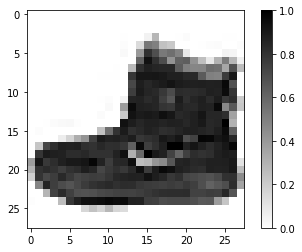

In [26]:
# Inspecting the first figure
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
# Feature normalization - scale all pixel intensities to values between 0 and 1
# This prevents large pixel intensities from skewing the activations of the neural network
train_images = train_images / 255.0
test_images = test_images / 255.0

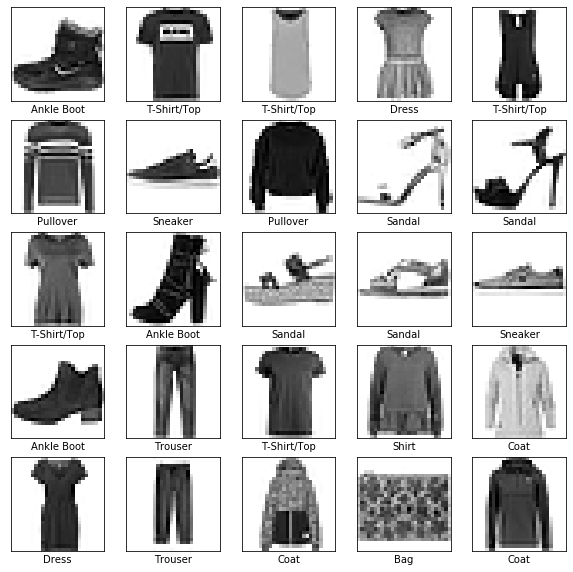

In [19]:
# Inspecting the first 25 elements in the training set and displaying class names below them
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)  # subplot rows, subplot cols, index of display in grid
    plt.xticks([])    # explicitly passing empty list to ensure no ticks along axes
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Building a Model

Keras lets us build neural networks by stacking together layers - the fundamental building blocks of NNs that are able to extract meaningful representations of the input data. 

The first `Flatten` layer transforms each 28 x 28 px 2D tensor into a 1D tensor of dim (28 * 28 = 784). No parameters to learn - only reformats data. 

The second `Dense` or fully connected layer has 128 nodes or neurons.

The last layer is `Softmax` of 10 units - one unit per each potential target class. Each unit computes the probability that a given input belongs to the class represented by that unit - together, their probabilities sum up to 1, and form a 10-dimensional vector of predictions.

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
]);

## Compiling the Model
Defining the loss function - the function that the model uses to compute the 'difference' between its prediction and the actual label for a training example. 

Also define the optimizer - the algorithm that the model uses to optimise its weights to minimise its loss.

Metrics provide numerical measures of the performance of the model. 

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Train the Model

In [27]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.4990 - acc: 0.8249
Epoch 2/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.3768 - acc: 0.8653
Epoch 3/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.3397 - acc: 0.8762
Epoch 4/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.3142 - acc: 0.8853
Epoch 5/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.2972 - acc: 0.8910
Epoch 6/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.2823 - acc: 0.8962
Epoch 7/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.2714 - acc: 0.8987
Epoch 8/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.2596 - acc: 0.9030
Epoch 9/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.2512 - acc: 0.9072
Epoch 10/10
60000/60000 [==============================] - 8s 134us/samp

## Evaluate Accuracy
After the model's weights have been optimised, we want to see how well the model does in terms of predictions on data it has never seen before. 

In [28]:
predictions = model.predict(test_images)

In [30]:
# Confirm that each prediction is actually a 10-dimensional vector
# Each value represents the model's confidence that the 0th test example belngs to a specific class
predictions[0]

array([4.1173451e-05, 7.4908547e-07, 1.6036252e-05, 2.6821127e-08,
       1.6581604e-08, 8.9880461e-03, 9.6711483e-06, 8.6288983e-03,
       3.7078408e-08, 9.8231536e-01], dtype=float32)

In [31]:
# Index of highest probability = index of clothing article the picture is likely to be 
np.argmax(predictions[0])

9

In [38]:
# Function to plot the image with a label that shows predicted clas, actual class, and prediction probability
def plot_image(i, predictions_array, true_label, img):
    # Making new variables to prevent args from being mutated
    predictions_arary, true_label, img = predictions_array, true_label[i], img[i] 
    
    # Plot this image
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    # Use argmax to find predicted label for this sample
    predicted_label = np.argmax(predictions_array)
    
    # Label color should change to indicate correct/incorrect predictions
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    # Display the predicted label, the prediction probability, and the actual label
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
    

In [35]:
# Creates a bar plot that shows prediction probabilities for all 10 classes for a given image
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

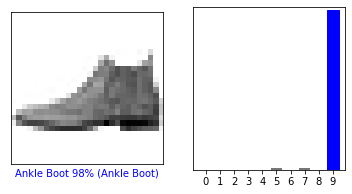

In [39]:
# Testing both these functions with the 0th training example
i = 0
plt.figure(figsize=(6, 3))

# The first plot will be the the 0th sample, its predicted and actual labels
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)

# The second plot will show the NN's prediction probabilities for all classes for this image
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)

plt.show()

The NN predicted with 98% confidence that the 0th sample was an ankle boot. We can see that the NN is overwhelmingly certain about this prediction, because the prediction probability for class 9 is several orders of magnitude higher than the other classes.

<function matplotlib.pyplot.show(*args, **kw)>

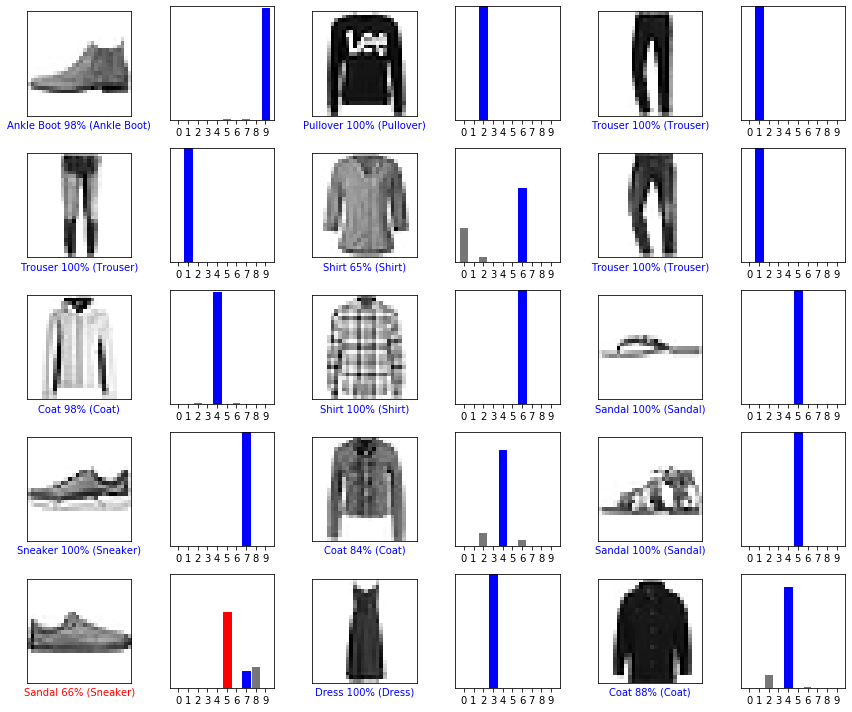

In [40]:
# Plotting the first X test images, predicted labels, and the true labels
# Color correct predictions in b lue and incorrect predictions in red

num_rows = 5; num_cols = 3
num_images = num_rows * num_cols

# More rows than cols because must also display labels
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
    
    
plt.tight_layout()
plt.show

This plot shows the predicted and actual labels along with prediction probabilities for the first 15 images in the test set. We can see that the only error in predictions is with the sneaker, where the model predicted the image to be a sandal. 

## Prediction - Single Image

In [41]:
# Grab an image from the test dataset
img = test_images[1]
print(img.shape)

(28, 28)


In [42]:
# Because tf models are optimised to make predictions on a batch
# Even if we are making predictions using a single example, it must be added to a list
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [43]:
predictions_single = model.predict(img)
print(predictions_single)

[[5.5573277e-05 8.4925145e-10 9.9917209e-01 1.4657774e-13 4.0701087e-04
  7.4481100e-16 3.6528293e-04 1.5278776e-18 6.5423751e-13 3.6067579e-16]]


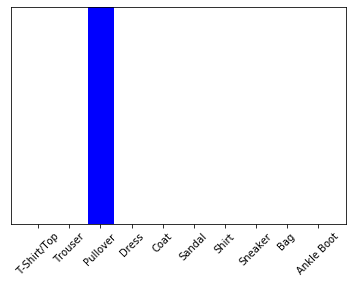

In [44]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [45]:
# What is the prediction for the (only) image?
np.argmax(predictions_single[0])

2